In [ ]:
import cv2 

img = cv2.imread(r'tornadoP')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

# Convolutional Neural Networks

# Importar Librerías

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [3]:
dirname = os.path.join(os.getcwd(), r'data/')
imgpath = dirname + os.sep 
images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\kevin\data/\
C:\Users\kevin\data/\incendio 1
C:\Users\kevin\data/\inundacion 14648
C:\Users\kevin\data/\robo 9945
C:\Users\kevin\data/\robocasa 9217
C:\Users\kevin\data/\tornado 2244
Directorios leidos: 5
Imagenes en cada directorio [14649, 9945, 9217, 2244, 16493]
suma Total de imagenes en subdirs: 52548


# Creamos las etiquetas

In [4]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  52548


In [5]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 incendio
1 inundacion
2 robo
3 robocasa
4 tornado


In [6]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [7]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (42038, 30, 30, 3) (42038,)
Testing data shape :  (10510, 30, 30, 3) (10510,)


Text(0.5, 1.0, 'Ground Truth : 1')

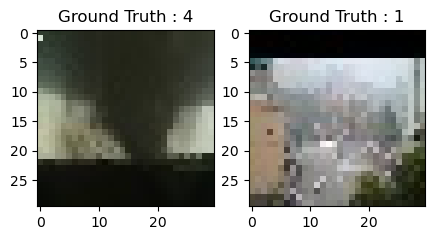

In [8]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

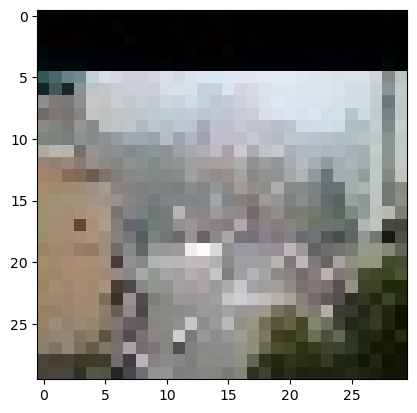

In [9]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [10]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1.]


# Creamos el Set de Entrenamiento y Validación

In [11]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [12]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(33630, 30, 30, 3) (8408, 30, 30, 3) (33630, 5) (8408, 5)


# Creamos el modelo de CNN

In [13]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [14]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(30,30,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))
sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

C:\Users\kevin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\kevin\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [15]:
sport_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       230,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,493 (904.27 KB)

 Trainable params: 231,493 (904.27 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate=INIT_LR), metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [17]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.3409 - loss: 1.4972 - val_accuracy: 0.7341 - val_loss: 1.1573
Epoch 2/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5291 - loss: 1.2245 - val_accuracy: 0.7755 - val_loss: 0.9390
Epoch 3/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.6077 - loss: 1.0621 - val_accuracy: 0.7870 - val_loss: 0.8038
Epoch 4/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.6531 - loss: 0.9478 - val_accuracy: 0.8373 - val_loss: 0.7031
Epoch 5/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7037 - loss: 0.8545 - val_accuracy: 0.8658 - val_loss: 0.6176
Epoch 6/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7360 - loss: 0.7796 - val_accuracy: 0.8790 - val_loss: 0.5453
Epoch 7/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7644 - loss: 0.7138 - val_accuracy: 0.8908 - val_loss: 0.4882
Epoch 8/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7907 - loss: 0.6481 - val_ac

In [18]:
sport_model.save(r"C:\\Users\\kevin\\Red Neuronal\\entrenado.keras")


# Evaluamos la red

In [19]:

test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9552 - loss: 0.1902


In [20]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.18334388732910156
Test accuracy: 0.9562321305274963


In [21]:
sport_train.history

{'accuracy': [0.4069878160953522,
  0.5536425709724426,
  0.6219744086265564,
  0.6689562797546387,
  0.7089800834655762,
  0.7423728704452515,
  0.7712756395339966,
  0.7940826416015625,
  0.8091585040092468,
  0.8248587846755981,
  0.8385370373725891,
  0.846625030040741,
  0.8580731749534607,
  0.8661016821861267,
  0.874397873878479,
  0.8808504343032837,
  0.8882247805595398,
  0.8923580050468445,
  0.8987511396408081,
  0.9042521715164185],
 'loss': [1.4163280725479126,
  1.1776155233383179,
  1.0296704769134521,
  0.9198160767555237,
  0.8336020708084106,
  0.7607415318489075,
  0.6955796480178833,
  0.6384496092796326,
  0.5926872491836548,
  0.5506563186645508,
  0.514606773853302,
  0.48530226945877075,
  0.45603227615356445,
  0.4326126277446747,
  0.40418192744255066,
  0.38590702414512634,
  0.3691367208957672,
  0.34921330213546753,
  0.33361053466796875,
  0.31757238507270813],
 'val_accuracy': [0.7340627908706665,
  0.7754519581794739,
  0.7869885563850403,
  0.83729779

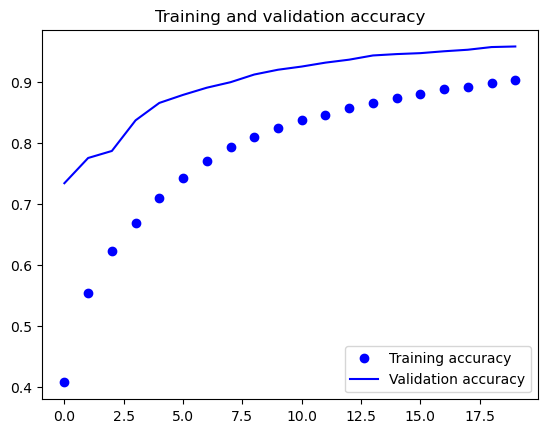

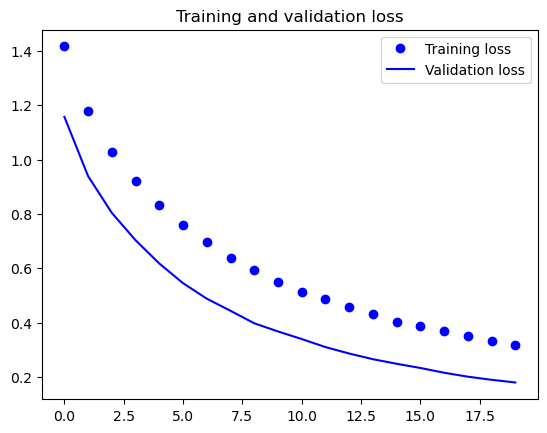

In [22]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
predicted_classes2 = sport_model.predict(test_X)

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [24]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [25]:
predicted_classes.shape, test_Y.shape

((10510,), (10510,))

# Aprendamos de los errores: Qué mejorar

Found 10050 correct labels


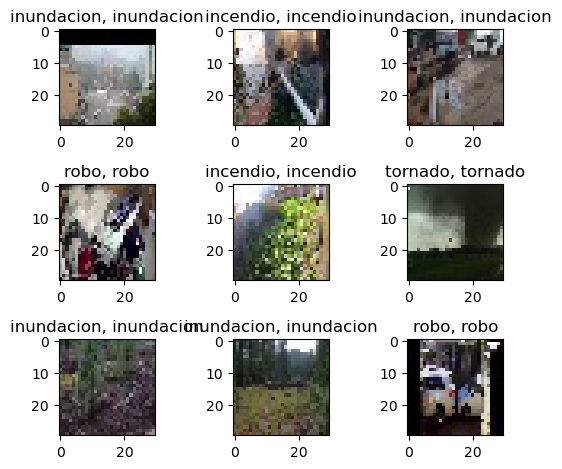

In [26]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(30,30,3), cmap='gray', interpolation='none') #CAMBIAR
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 460 incorrect labels


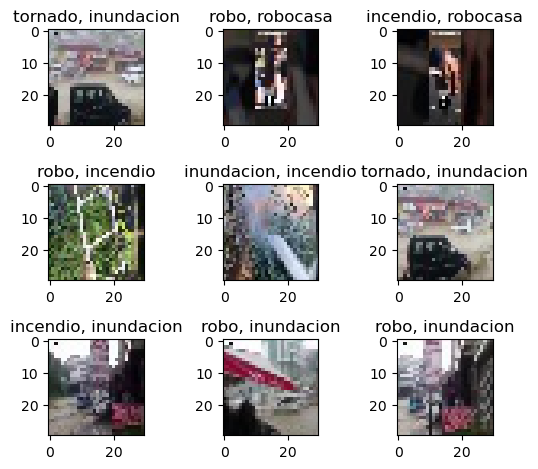

In [27]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(30,30,3), cmap='gray', interpolation='none')  #CAMBIAR
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [28]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

#nos da la precision de cada clase, algunos esta alto y otros bajos, puede ser porque se tienen pocos ejemplos de ciertas situaciones. 

              precision    recall  f1-score   support

     Class 0       0.94      0.98      0.96      2928
     Class 1       0.97      0.89      0.93      1983
     Class 2       0.95      0.99      0.97      1906
     Class 3       1.00      0.86      0.93       476
     Class 4       0.97      0.97      0.97      3217

    accuracy                           0.96     10510
   macro avg       0.96      0.94      0.95     10510
weighted avg       0.96      0.96      0.96     10510



In [41]:
from skimage.transform import resize

images=[]
filenames = [r'C:\\Users\\kevin\\pruebas\\robocasa2.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (30, 30),anti_aliasing=True,clip=False,preserve_range=True) #CAMBIAR TIENEN Q COINCIDIR CON EL TAMAÑO DE PIXELES.
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.
 
predicted_classes = sport_model.predict(test_X) #MODELO, no se carga archivo .h5 .keras, agarra IMG, de las que no tiene y retorna clase a la que pertenece.

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])
   

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
C:\\Users\\kevin\\pruebas\\robocasa2.jpg robocasa
